In [237]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df = pd.read_csv('.\input\SQL_M8_support material_exercise_credit.csv',names=['idade',
                                                                              'sexo',
                                                                              'dependentes',
                                                                              'escolaridade',
                                                                              'estado_civil',
                                                                              'salario_anual',
                                                                              'tipo_cartao',
                                                                              'qtd_produtos',
                                                                              'iteracoes_12m',
                                                                              'meses_inativo_12m',
                                                                              'limite_credito',
                                                                              'valor_transacoes_12m',
                                                                              'qtd_transacoes_12m'])
df['sexo'] = df['sexo'].map({'F': 'Feminino', 'M': 'Masculino'})
df = df[(df['escolaridade'] != 'na')]

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_14148\1390136368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['escolaridade'], palette='tab10')


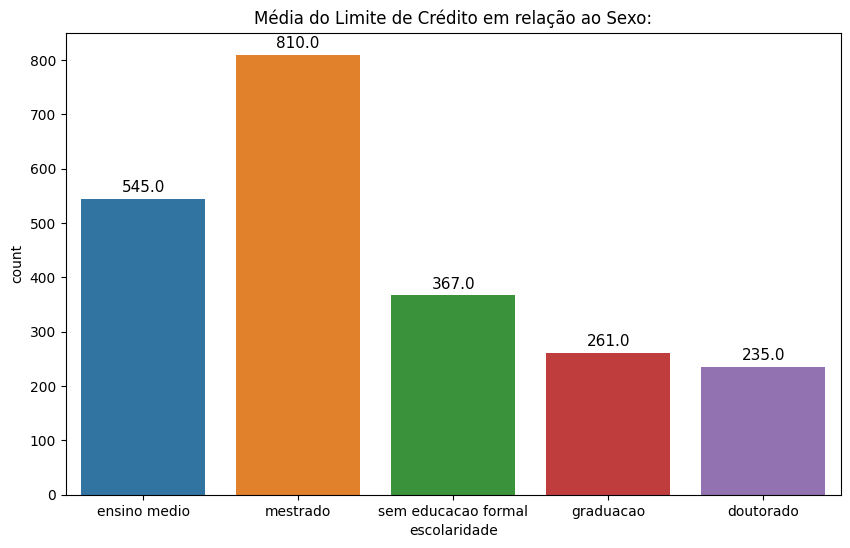

In [258]:
plt.subplots(figsize=(10,6))
ax = sns.countplot(x=df['escolaridade'], palette='tab10')
ax.set_title('Média do Limite de Crédito em relação ao Sexo:')
for p in ax.patches:
        ax.annotate(f'{float(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=0)

plt.show()

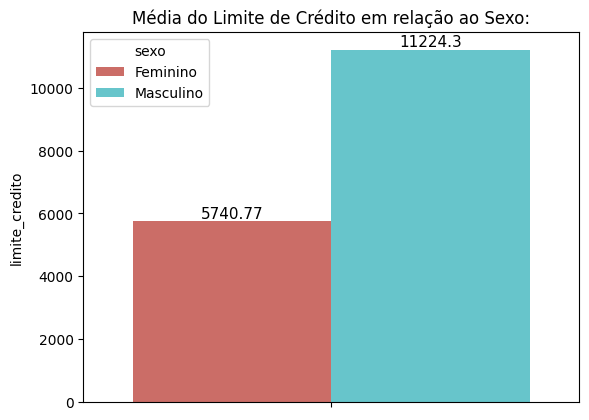

In [245]:
ax = sns.barplot(data=df[['limite_credito', 'sexo']].groupby('sexo').mean().round(2), y='limite_credito', hue='sexo', palette='hls')
ax.set_title('Média do Limite de Crédito em relação ao Sexo:')
for p in ax.patches:
        ax.annotate(f'{float(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() - 100),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points', rotation=0)

In [246]:
df.escolaridade.value_counts()

escolaridade
mestrado               810
ensino medio           545
sem educacao formal    367
graduacao              261
doutorado              235
Name: count, dtype: int64

In [248]:
plt.bar(df.escolaridade.value_counts(),
            explode=(0, 0.3),
            labels=df.escolaridade.value_counts().index,
            autopct='%1.2f%%',
            shadow=True,
            startangle=140)
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

![EBAC](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/ebac_logo-data_science.png?raw=true)

# **Projeto Final do Curso de SQL da EBAC**
### **Exploração e análise de dados de crédito com SQL**

**Aluno:** [Marcelo Aires ![LinkedIn](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/linkedin.png?raw=true)](https://www.linkedin.com/in/marceloaco/)

---

## **1. Dados do Dataset:** 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

| *Coluna*                  | *Explicação*                                            |
|---------------------------|---------------------------------------------------------|
| **idade**                 | idade do cliente                                        |
| **sexo**                  | sexo do cliente (F ou M)                                |
| **dependentes**           | número de dependentes do cliente                        |
| **escolaridade**          | nível de escolaridade do cliente                        |
| **salario_anual**         | faixa salarial do cliente                               |
| **tipo_cartao**           | tipo de cartão do cliente                               |
| **qtd_produtos**          | quantidade de produtos comprados nos últimos 12 meses   |
| **iteracoes_12m**         | quantidade de iterações/transações nos últimos 12 meses |
| **meses_inativo_12m**     | quantidade de meses que o cliente ficou inativo         |
| **limite_credito**        | limite de crédito do cliente                            |
| **valor_transacoes_12m**  | valor das transações dos últimos 12 meses               |
| **qtd_transacoes_12m**    | quantidade de transações dos últimos 12 meses           |


A tabela foi criada no **AWS Athena** junto com o **S3 Bucket**, a própria EBAC disponibilizou o arquivo CSV.

---

## **2. Criação da Tabela no AWS Athena:**

Após criar o bucket no AWS S3 e carregar o CSV disponibilizado pela EBAC, podemos criar a Tabela no AWS Athena vinculado com o bucket que iremos utilizar neste projeto.

Para criarmos a tabela utilizamos este comando:

#### CREATE TABLE:

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
	`idade` int,
	`sexo` string,
	`dependentes` int,
	`escolaridade` string,
	`estado_civil` string,
	`salario_anual` string,
	`tipo_cartao` string,
	`qtd_produtos` bigint,
	`iteracoes_12m` int,
	`meses_inativo_12m` int,
	`limite_credito` float,
	`valor_transacoes_12m` float,
	`qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
	'serialization.format' = ',',
	'field.delim' = ','
)
LOCATION 's3://credito-projetofinal-marceloaco/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```
![Query1](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/Criar-Tabela.png?raw=true)

---

## **3. Análise Exploratória de Dados (EDA):**

Após a criação da tabela no *AWS*, podemos analisar o conjunto de dados pelo *Athena*.

#### **3.1. Número de Linhas:**
```sql
SELECT COUNT(*) AS total_linhas
FROM credito;
```
![totalLinhas](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/totalLinhas.png?raw=true)

#### **3.2. Número de Colunas:**
```sql
SELECT COUNT(*) AS total_colunas
FROM INFORMATION_SCHEMA.COLUMNS
WHERE TABLE_NAME = 'credito';
```
![totalColunas](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/totalColunas.png?raw=true)

---

#### **3.3. Tipos de cada coluna:**
```C#
DESCRIBE credito;
```
| Coluna               | Tipo   |
| -------------------- | ------ |
| idade                | int    |
| sexo                 | string |
| dependentes          | int    |
| escolaridade         | string |
| estado_civil         | string |
| salario_anual        | string |
| tipo_cartao          | string |
| qtd_produtos         | bigint |
| iteracoes_12m        | int    |
| meses_inativo_12m    | int    |
| limite_credito       | float  |
| valor_transacoes_12m | float  |
| qtd_transacoes_12m   | int    |

---

#### 3.4. QUERY 1:

```sql
SELECT * FROM credito LIMIT 10;
```
![Limite10](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/credito_lim10.png?raw=true)

> Primeira visualização da Tabela (10 primeiras linhas), já percebemos alguns valores nulos.

---

#### 3.5. QUERY 2:

```sql
SELECT idade, COUNT(idade) AS Quantidade FROM credito GROUP BY idade;
SELECT sexo, COUNT(sexo) AS Quantidade FROM credito GROUP BY sexo;
```

![sexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/sexoQuant.png?raw=true)

``` sql
SELECT dependentes, COUNT(dependentes) AS Quantidade FROM credito GROUP BY dependentes;
SELECT escolaridade, COUNT(escolaridade) AS Quantidade FROM credito GROUP BY escolaridade;
```

![escolaridadeNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/escolaridadeNA.png?raw=true)

``` sql
SELECT estado_civil, COUNT(estado_civil) AS Quantidade FROM credito GROUP BY estado_civil;
```

![estadoCivilNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/estadoCivilNA.png?raw=true)

``` sql
SELECT salario_anual, COUNT(salario_anual) AS Quantidade FROM credito GROUP BY salario_anual;
```

![salarioAnualNA](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/salarioAnualNA.png?raw=true)

``` sql
SELECT tipo_cartao, COUNT(tipo_cartao) AS Quantidade FROM credito GROUP BY tipo_cartao;
```

![tiposCartaoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/tiposCartaoQuant.png?raw=true)

``` sql
SELECT qtd_produtos, COUNT(qtd_produtos) AS Quantidade FROM credito GROUP BY qtd_produtos;
SELECT iteracoes_12m, COUNT(iteracoes_12m) AS Quantidade FROM credito GROUP BY iteracoes_12m;
SELECT meses_inativo_12m, COUNT(meses_inativo_12m) AS Quantidade FROM credito GROUP BY meses_inativo_12m;
SELECT limite_credito, COUNT(limite_credito) AS Quantidade FROM credito GROUP BY limite_credito;
SELECT valor_transacoes_12m, COUNT(valor_transacoes_12m) AS Quantidade FROM credito GROUP BY valor_transacoes_12m;
SELECT qtd_transacoes_12m, COUNT(qtd_transacoes_12m) AS Quantidade FROM credito GROUP BY qtd_transacoes_12m;
```

> Analisando cada uma das colunas, percebemos aonde estão os valores nulos, como mostra nas figuras acima.

> Percebemos que na coluna 'sexo' contem mais Homens do que Mulheres. 

> E na coluna 'tipo_cartao' verificamos que existem 4 tipos de cartões, sendo o cartão blue mais comum entre eles.
---

## **4. Análise de Dados:**

Após a exploração dos dados e do entedimento do nosso dataset, podemos analisar os dados e buscar aprofundar ainda mais no entendimento do negócio.

#### **4.1 Média do Limite de Crédito em relação ao salário anual:**
```sql
SELECT AVG(limite_credito) AS media_limite_credito,
	salario_anual
FROM credito
WHERE salario_anual != 'na'
GROUP BY salario_anual
ORDER BY media_limite_credito DESC;
```
![mediaLimiteCreditoSalario](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/mediaLimiteCreditoSalario.png?raw=true)

> Vemos que existe um padrão para liberação de crédito de acordo com o salário anual do cliente.

---

#### **4.2. Análise de sexo:**
```sql
SELECT sexo,
	COUNT(*) AS quantidade
FROM credito
GROUP BY sexo;
```
![sexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/sexoQuant.png?raw=true)
![graficoSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/graficoSexoQuant.png?raw=true)

> Vemos que o número de homens é superior ao número de mulheres. Vamos nos aprofundar nas etapas seguintes.

#### **4.2.1. Média do Limite de Crédito em relação ao Sexo:**

```sql
SELECT sexo,
	AVG(limite_credito) AS Media_Limite_Credito,
	COUNT(sexo) AS Quantidade
FROM credito
GROUP BY sexo
ORDER BY Quantidade DESC;
```

![mediaLimiteCreditoSexo](https://github.com/marceloaires7/EBAC-SQL/blob/ba9ea1c1001a9855cc804e68f5d21f0c8e150def/MODULO_08/images/mediaLimiteCreditoSexo.png?raw=true)
![grafMediaLimiteCreditoSexo](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/grafMediaLimiteCreditoSexo.png?raw=true)

> Observa-se uma grande discrepância entre os créditos liberados para homens e mulheres.

#### **4.2.2. Salário Anual em relação ao Sexo:**

```sql
SELECT sexo,
	salario_anual,
	COUNT(sexo) AS Quantidade
FROM credito
WHERE salario_anual != 'na'
GROUP BY sexo, salario_anual
ORDER BY Quantidade DESC;
```

![salarioAnualSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/salarioAnualSexoQuant.png?raw=true)
![graficoSalarioSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/graficoSalarioSexoQuant.png?raw=true)

> Observamos que a grande discrepância na consulta anterior se deve à significativa desproporção entre homens e mulheres no que diz respeito ao salário anual. O dataset fornecido pela EBAC, infelizmente, contém apenas informações de mulheres com renda baixa.

---

#### **4.3. Análise de Escolaridade (sem NA):**
```sql
SELECT escolaridade,
	COUNT(*) AS Quantidade
FROM credito
WHERE escolaridade != 'na'
GROUP BY escolaridade
ORDER BY Quantidade DESC;
```
![escolaridadeQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/escolaridadeQuant.png?raw=true)
![graficoSexoQuant](https://github.com/marceloaires7/EBAC-SQL/blob/main/MODULO_08/images/graficoSexoQuant.png?raw=true)

> Vemos que o número de homens é superior ao número de mulheres. Vamos nos aprofundar nas etapas seguintes.